# Introduction
The goal of this study is to test the relationship between different factors and humor, in other words, how these factors relate to whether people find a joke funny or not.The data was gathered from questionnaires posted on prolific. The questionnaire consisted of five jokes, each randomly selected from their respective joke pool, and participants were required to answer a number of questions after watching each joke. The questions are mainly yes/no multiple choice and scale choice. There are three csv files included with the notebook, the raw data "humor_raw", the fixed data for R "humor_r", the variable document "humor_variables".

# Preprocessing
Since the goal of the study is to figure the general nature of the humor, participants' individual factors are not what the study concerns. All participants' personal related information are excluded from raw version to R version, only questions and answers are saved. Codes of Questions are replaced by variable name. Blanks are replaced by value 0 (as default value for those questions). There are no character variables with more than 3 levels and others are numberic variables, so there is no further action for R version dataset.

In [4]:
#library
library(janitor, include.only = "clean_names")
library(cowplot, include.only = "plot_grid") 
library(kableExtra, exclude = "group_rows") 
library(tidyverse) 
library(tidymodels) 
devtools::source_url("https://github.com/jjcurtin/lab_support/blob/main/fun_eda.R?raw=true")
devtools::source_url("https://github.com/jjcurtin/lab_support/blob/main/fun_plots.R?raw=true")

ℹ SHA-1 hash of file is "d3120e9f6c258fd5824bc85989903ee3863c2e73"
ℹ SHA-1 hash of file is "def6ce26ed7b2493931fde811adff9287ee8d874"


In [14]:
#load data
d <- read_csv("humor_r.csv") 

#calculate the total violation value
d$violation1 <- d$violation1_1 + d$violation1_2 + d$violation1_3 + d$violation1_4 + d$violation1_5
d$violation2 <- d$violation2_1 + d$violation2_2 + d$violation2_3 + d$violation2_4 + d$violation2_5
d$violation3 <- d$violation3_1 + d$violation3_2 + d$violation3_3 + d$violation3_4 + d$violation3_5
d$violation4 <- d$violation4_1 + d$violation4_2 + d$violation4_3 + d$violation4_4 + d$violation4_5
d$violation5 <- d$violation5_1 + d$violation5_2 + d$violation5_3 + d$violation5_4 + d$violation5_5

Rows: 28 Columns: 51
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (16): state, arousal1, accept1, jump1, arousal2, accept2, jump2, arousal...
dbl (35): funny1, violation1_1, violation1_2, violation1_3, violation1_4, vi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
#check complete rate and outliars
skim_all(d)
#the data is complete and no obvious outliars

#check result distribution
d |> plot_hist("funny1")
d |> plot_hist("funny2")
d |> plot_hist("funny3")
d |> plot_hist("funny4")
d |> plot_hist("funny5")

#check relationship between state and result
d |> plot_grouped_box_violin("state", "funny1")
d |> plot_grouped_box_violin("state", "funny2")
d |> plot_grouped_box_violin("state", "funny3")
d |> plot_grouped_box_violin("state", "funny4")
d |> plot_grouped_box_violin("state", "funny5")

#check relationship between arousal and result
d |> plot_grouped_box_violin("arousal1", "funny1")
d |> plot_grouped_box_violin("arousal2", "funny2")
d |> plot_grouped_box_violin("arousal3", "funny3")
d |> plot_grouped_box_violin("arousal4", "funny4")
d |> plot_grouped_box_violin("arousal5", "funny5")

#check relationship between violation and result
d |> plot_scatter("violation1", "funny1")
d |> plot_scatter("violation2", "funny2")
d |> plot_scatter("violation3", "funny3")
d |> plot_scatter("violation4", "funny4")
d |> plot_scatter("violation5", "funny5")

#check relationship between accept and result
d |> plot_grouped_box_violin("accept1", "funny1")
d |> plot_grouped_box_violin("accept2", "funny2")
d |> plot_grouped_box_violin("accept3", "funny3")
d |> plot_grouped_box_violin("accept4", "funny4")
d |> plot_grouped_box_violin("accept5", "funny5")

── Data Summary ────────────────────────
                           Values
Name                       d     
Number of rows             28    
Number of columns          56    
_______________________          
Column type frequency:           
  character                16    
  numeric                  40    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
   skim_variable n_missing complete_rate min max empty n_unique whitespace
 1 state                 0             1  27  28     0        2          0
 2 arousal1              0             1   2   3     0        2          0
 3 accept1               0             1  15  16     0        2          0
 4 jump1                 0             1   2   3     0        2          0
 5 arousal2              0             1   2   3     0        2          0
 6 accept2               0             1  15  16     0        2          0
 7 jump2    

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 18' in coercion to 'logical(1)'


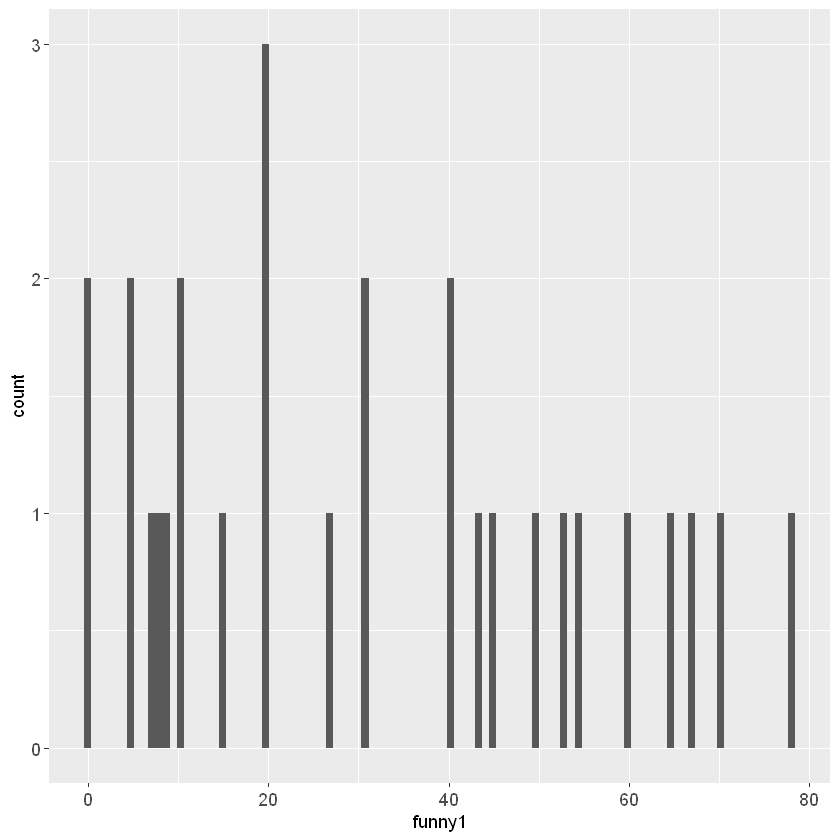

In [13]:
d |> plot_hist("funny1")